# **Home task : KNN classification**

## 1. `iris` dataset

In [139]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

iris = load_iris()

X, y = iris.data, iris.target
labels = iris.target_names
feature_names = iris.feature_names


In [140]:
df_iris = pd.DataFrame(X, columns=feature_names) 
df_iris['label'] = y
features_dict = {k: v for k, v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

print(df_iris.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2025)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label label_names  
0      0      setosa  
1      0      setosa  
2      0      setosa  
3      0      setosa  
4      0      setosa  


In [141]:
accuracies = {}

print("K\tAccuracy:")
for k in range(1, 21):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"K={k}, Accuracy={acc:.2f}")

K	Accuracy:
K=1, Accuracy=0.95
K=2, Accuracy=0.95
K=3, Accuracy=0.95
K=4, Accuracy=0.95
K=5, Accuracy=0.95
K=6, Accuracy=0.95
K=7, Accuracy=0.95
K=8, Accuracy=0.97
K=9, Accuracy=0.95
K=10, Accuracy=0.95
K=11, Accuracy=0.95
K=12, Accuracy=0.95
K=13, Accuracy=0.95
K=14, Accuracy=0.95
K=15, Accuracy=0.95
K=16, Accuracy=0.97
K=17, Accuracy=0.95
K=18, Accuracy=0.97
K=19, Accuracy=0.95
K=20, Accuracy=0.97


In [142]:
best_k = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_k]
print(f"\nThe best K value is {best_k} with an accuracy of {best_accuracy:.2f}.")


The best K value is 8 with an accuracy of 0.97.


## 2. Synthetic dataset

In [171]:
X, y = make_regression(n_samples=300, n_features=1, noise=15)


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [175]:
K_best = 0
score_best = 0

for i in range(1, 76):
    clf = KNeighborsRegressor(i)
    clf.fit(X_train_scaled, y_train)
    
    score = clf.score(X_test_scaled, y_test)  
    
    if score_best < score:
        score_best = score
        K_best = i

print(f'The best k = {K_best}, score = {score_best:.4f}')


The best k = 3, score = 0.9400


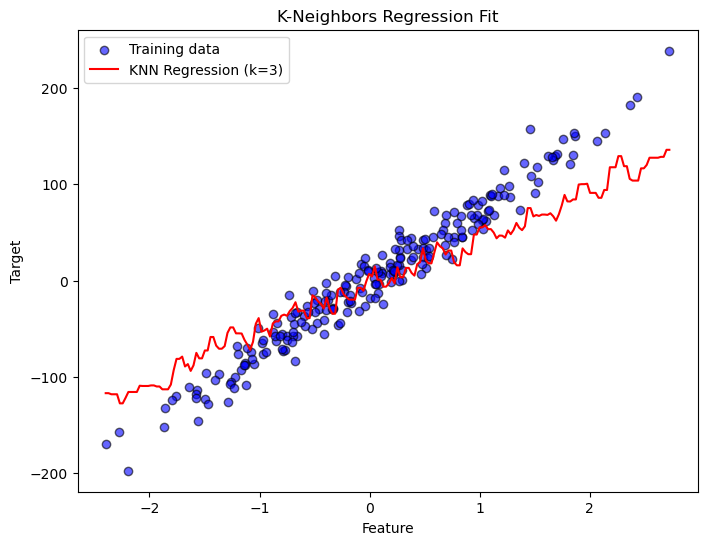

In [177]:
best_knn = KNeighborsRegressor(n_neighbors=K_best)
best_knn.fit(X_train_scaled, y_train)

X_range = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
X_range_scaled = scaler.fit_transform(X_range)
y_pred = best_knn.predict(X_range_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data', edgecolor='k', alpha=0.6)
plt.plot(X_range, y_pred, color='red', label=f'KNN Regression (k={best_knn.n_neighbors})')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("K-Neighbors Regression Fit")
plt.legend()
plt.show()